# Project Title


ZEENA LISA KARARI

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
file_path = 'path_to_your_file/AviationData.csv'
aviation_data = pd.read_csv('AviationData.csv', encoding='latin1')

# Display basic information about the dataset
aviation_data.info()

NameError: name 'pd' is not defined

In [179]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [180]:
# Check for missing values in each column
missing_data = aviation_data.isnull().sum()
print(missing_data)

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                    52
                         ...  
Total.Uninjured           5912
Weather.Condition         4492
Broad.phase.of.flight    27165
Report.Status             6384
Publication.Date         13771
Length: 31, dtype: int64


In [181]:
# Summary statistics for numerical columns
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [182]:
for column in aviation_data.columns:
    if not pd.api.types.is_numeric_dtype(aviation_data[column]):
        unique_values = aviation_data[column].dropna().unique()  # Get unique values, excluding NaNs
        print(f"'{column}: \n' {unique_values[:5]}")

'Event.Id: 
' ['20001218X45444' '20001218X45447' '20061025X01555' '20001218X45448'
 '20041105X01764']
'Investigation.Type: 
' ['Accident' 'Incident']
'Accident.Number: 
' ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' 'LAX96LA321' 'CHI79FA064']
'Event.Date: 
' ['1948-10-24' '1962-07-19' '1974-08-30' '1977-06-19' '1979-08-02']
'Location: 
' ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' 'EUREKA, CA'
 'Canton, OH']
'Country: 
' ['United States' 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND']
'Latitude: 
' [36.922223 42.445277 30.757778 46.041111 48.12]
'Longitude: 
' [-81.878056 -70.758333 -88.355555 -120.849722 -113.8875]
'Airport.Code: 
' ['N58' 'JAX' 'T72' '5G6' 'YIP']
'Airport.Name: 
' ['BLACKBURN AG STRIP' 'HANOVER' 'JACKSONVILLE INTL' 'TUSKEGEE'
 'HEARNE MUNICIPAL']
'Injury.Severity: 
' ['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal']
'Aircraft.damage: 
' ['Destroyed' 'Substantial' 'Minor' 'Unknown']
'Aircraft.Category: 
' ['Airplane' 'Helicopter' 'Glider' 'B

In [183]:
makes = aviation_data['Make'].unique()
len(makes)

8238

In [184]:
# Select only the numeric columns from the dataset
numeric_columns = aviation_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

                        Number.of.Engines  Total.Fatal.Injuries  \
Number.of.Engines                1.000000              0.098505   
Total.Fatal.Injuries             0.098505              1.000000   
Total.Serious.Injuries           0.046157              0.135724   
Total.Minor.Injuries             0.098162              0.073559   
Total.Uninjured                  0.406058             -0.015214   

                        Total.Serious.Injuries  Total.Minor.Injuries  \
Number.of.Engines                     0.046157              0.098162   
Total.Fatal.Injuries                  0.135724              0.073559   
Total.Serious.Injuries                1.000000              0.326849   
Total.Minor.Injuries                  0.326849              1.000000   
Total.Uninjured                       0.052869              0.147770   

                        Total.Uninjured  
Number.of.Engines              0.406058  
Total.Fatal.Injuries          -0.015214  
Total.Serious.Injuries         0.05286

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [185]:
for column in aviation_data.select_dtypes(include='number').columns:
    if column == 'Number.of.Engines':
        # Replace NaN values with 1 for 'Number.of.Engines'
        aviation_data[column].fillna(1, inplace=True)
    else:
        # Replace NaN values with 0 for all other numerical columns
        aviation_data[column].fillna(0, inplace=True)
        
aviation_data['Number.of.Engines'].isnull().sum()


C:\Users\User\AppData\Local\Temp\ipykernel_13360\1546154133.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data[column].fillna(1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13360\1546154133.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

0

In [186]:
# List of columns where you want to replace missing values with 'Unknown'
# Replace missing values with 'Unknown' using a dictionary to specify the column-value pairs
aviation_data.fillna({'Location': 'Unknown', 
                      'Country': 'Unknown',
                      'Make' :'Unknown',
                      'Model':'Unknown',
                      'Amateur.Built':'Unknown',
                      'Engine.Type':'Unknown',
                      'Purpose.of.flight':'Unknown',
                      'Broad.phase.of.flight':'Unknown',
                      'Airport.Name':'Unknown',
                      'Weather.Condition': 'Unknown'},inplace=True)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
aviation_data.head(1000)
aviation_data['Weather.Condition'].unique()  
#aviation_data['Weather.Condition'].isnull().sum()

array(['UNK', 'IMC', 'VMC', 'Unknown', 'Unk'], dtype=object)

In [187]:
# Specify the columns to drop
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code','Registration.Number','Injury.Severity','FAR.Description','Schedule','Air.carrier','Report.Status','Publication.Date']

# Create a new DataFrame without the specified columns
aviation_data1 = aviation_data.drop(columns=columns_to_drop)

# Display the new DataFrame information
print(aviation_data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Airport.Name            88889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88889 non-null  object 
 10  Model                   88889 non-null  object 
 11  Amateur.Built           88889 non-null  object 
 12  Number.of.Engines       88889 non-null  float64
 13  Engine.Type             88889 non-null  object 
 14  Purpose.of.flight       88889 non-null

In [188]:
# Create a new column 'Injuries' by summing 'Total.Serious.Injuries' and 'Total.Minor.Injuries'
aviation_data1['Injuries'] = aviation_data1['Total.Serious.Injuries'] + aviation_data1['Total.Minor.Injuries']
# Display the updated DataFrame to verify the changes
print(aviation_data1[['Injuries']].head())

   Injuries
0       0.0
1       0.0
2       0.0
3       0.0
4       2.0


In [189]:
# Rename the column 'Total.Fatal.Injuries' to 'Deaths'
aviation_data1.rename(columns={'Total.Fatal.Injuries': 'Deaths'}, inplace=True)

# Display the updated DataFrame to verify the change
print(aviation_data1[['Deaths']].head())

   Deaths
0     2.0
1     4.0
2     3.0
3     2.0
4     1.0


In [190]:
# Combine 'Make' and 'Model' columns into a new column named 'Aircraft'
aviation_data1['Aircraft'] = aviation_data1['Make'] + ' ' + aviation_data1['Model']

# Display the updated DataFrame with the new column
print(aviation_data1[['Make', 'Model', 'Aircraft']].head())

       Make     Model        Aircraft
0   Stinson     108-3   Stinson 108-3
1     Piper  PA24-180  Piper PA24-180
2    Cessna      172M     Cessna 172M
3  Rockwell       112    Rockwell 112
4    Cessna       501      Cessna 501


In [191]:
# Convert 'Event.Date' to datetime format
aviation_data1['Event.Date'] = pd.to_datetime(aviation_data1['Event.Date'], errors='coerce')

# Display the updated DataFrame to verify the conversion
print(aviation_data1[['Event.Date']].head())

  Event.Date
0 1948-10-24
1 1962-07-19
2 1974-08-30
3 1977-06-19
4 1979-08-02


In [192]:
# Check for duplicates before dropping
duplicate_rows = aviation_data1.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_rows}")

# Remove duplicated rows
aviation_data1.drop_duplicates(inplace=True)

# Check for duplicates after dropping
duplicate_rows_after = aviation_data1.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after}")

# Display the updated DataFrame to verify changes
print(aviation_data1.info())

Number of duplicate rows before removal: 2
Number of duplicate rows after removal: 0
<class 'pandas.core.frame.DataFrame'>
Index: 88887 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88887 non-null  object        
 1   Investigation.Type      88887 non-null  object        
 2   Accident.Number         88887 non-null  object        
 3   Event.Date              88887 non-null  datetime64[ns]
 4   Location                88887 non-null  object        
 5   Country                 88887 non-null  object        
 6   Airport.Name            88887 non-null  object        
 7   Aircraft.damage         85694 non-null  object        
 8   Aircraft.Category       32285 non-null  object        
 9   Make                    88887 non-null  object        
 10  Model                   88887 non-null  object        
 11  Amateur.Built           88

In [193]:
aviation_data1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Deaths,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injuries,Aircraft
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,0.0,Stinson 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,0.0,Piper PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,0.0,Cessna 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,0.0,Rockwell 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Destroyed,NaN,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,2.0,Cessna 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Unknown,NaN,NaN,PIPER,PA-28-151,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,1.0,PIPER PA-28-151
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,NaN,NaN,BELLANCA,7ECA,No,1.0,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,0.0,BELLANCA 7ECA
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAYSON,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,0.0,AMERICAN CHAMPION AIRCRAFT 8GCBC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,NaN,NaN,CESSNA,210N,No,1.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,0.0,CESSNA 210N


In [194]:
# Find the mode of 'Aircraft.damage' column
mode_damage = aviation_data1['Aircraft.damage'].mode()[0]  # Get the most frequent value
print(f"Mode of Aircraft Damage: {mode_damage}")

# Find the mode of 'Aircraft.Category' column
mode_category = aviation_data1['Aircraft.Category'].mode()[0]  # Get the most frequent value
print(f"Mode of Aircraft Category: {Aircraft.Categoryy}")

Mode of Aircraft Damage: Substantial


NameError: name 'Aircraft' is not defined

In [ ]:
aviation_data1.fillna({
    'Aircraft.damage':mode_damage,
    'Aircraft.Category':mode_category,},inplace=True)


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Display the first few rows and basic info
aviation_data1.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Deaths,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injuries,Aircraft
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,0,0,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,0.0,Stinson 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,0,0,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,0.0,Piper PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,0,0,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,0.0,Cessna 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,0,0,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,0.0,Rockwell 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,0,0,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,2.0,Cessna 501


In [ ]:
# Drop rows with NaN values in critical columns for modeling
aviation_data1.dropna(subset=['Aircraft.damage', 'Aircraft.Category'], inplace=True)

# Check remaining data after dropping NaN values
print(aviation_data1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88887 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88887 non-null  object        
 1   Investigation.Type      88887 non-null  object        
 2   Accident.Number         88887 non-null  object        
 3   Event.Date              88887 non-null  datetime64[ns]
 4   Location                88887 non-null  object        
 5   Country                 88887 non-null  object        
 6   Airport.Name            88887 non-null  object        
 7   Aircraft.damage         88887 non-null  object        
 8   Aircraft.Category       88887 non-null  object        
 9   Make                    88887 non-null  object        
 10  Model                   88887 non-null  object        
 11  Amateur.Built           88887 non-null  object        
 12  Number.of.Engines       88887 non-null  float64    

In [ ]:
# Define features and target variable
X = aviation_data1[['Aircraft.damage', 'Aircraft.Category', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
y = aviation_data1['Deaths']  # Predicting number of deaths

# Display feature set and target variable
X.head()
y.head()

0    2.0
1    4.0
2    3.0
3    2.0
4    1.0
Name: Deaths, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (71109, 4), (71109,)
Testing set shape: (17778, 4), (17778,)


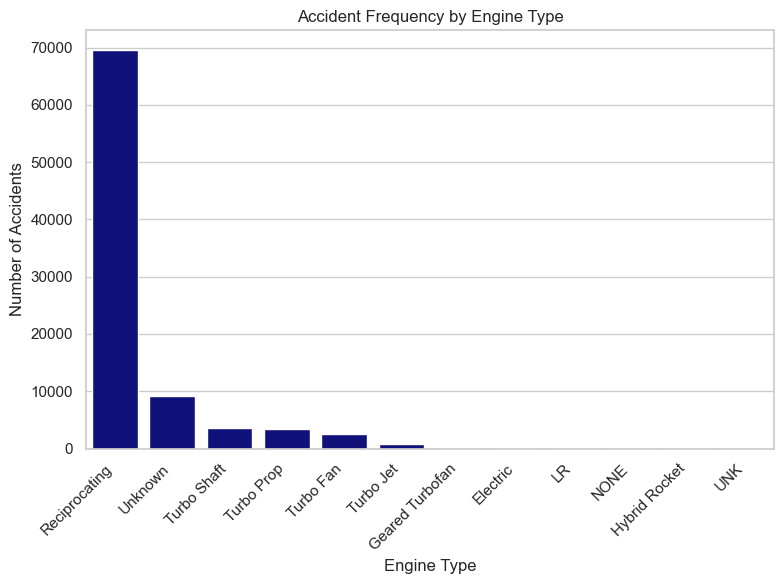

In [ ]:
# Bar Chart - Number of accidents by engine type
plt.figure(figsize=(8,6))
sns.barplot(x=engine_type_accidents.index, y=engine_type_accidents.values, color='darkblue')  # Use a single color
plt.title('Accident Frequency by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


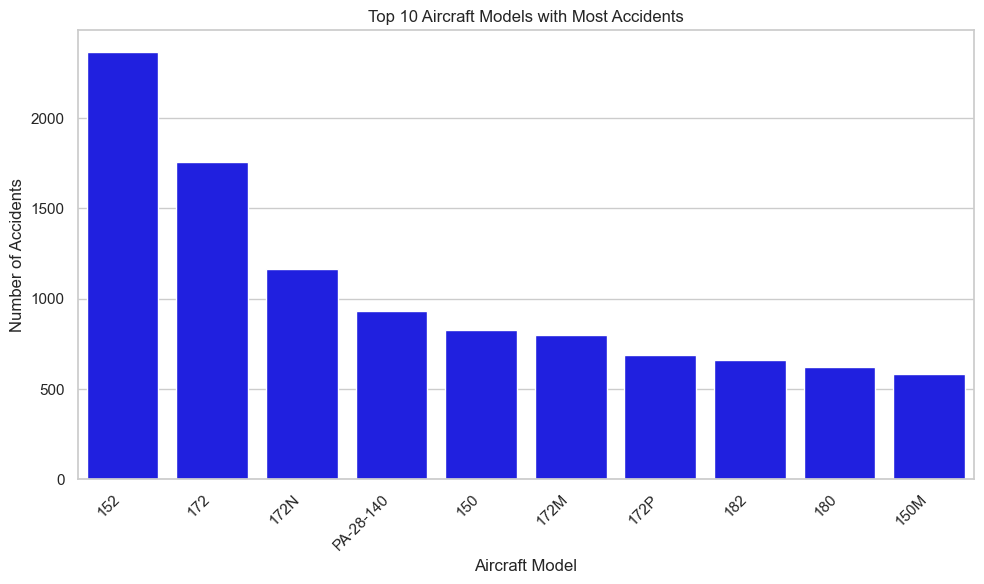

In [ ]:
# Bar Chart - Top 10 Aircraft Models with Most Accidents
plt.figure(figsize=(10,6))
sns.barplot(x=model_accidents.index, y=model_accidents.values, color='blue')  # Use a single color
plt.title('Top 10 Aircraft Models with Most Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


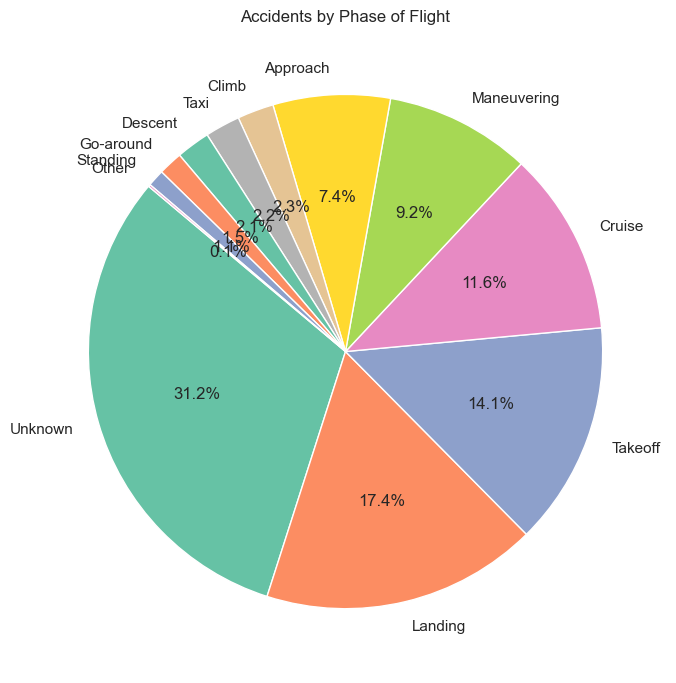

In [ ]:
# Visualization 4: Pie chart - Accident phase of flight
flight_phase = aviation_data1['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(flight_phase, labels=flight_phase.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Accidents by Phase of Flight')
plt.tight_layout()
plt.show()

In [197]:
import pandas as pd

def check_data_quality(aviation_data1):
    """
    This function checks the data quality of a DataFrame.
    It returns missing values, duplicate rows, and the presence of outliers.
    """
    print("----Data Quality Report----")
    
jih


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***